### Model, Loss Function, Optimizer Gengerate

In [69]:
# 모델을 device로 옮긴다. (모델을 이용한 계산을 GPU에서 할지 CPU에서 할지)

model = MNistModel()
model= model.to(device)

# loss function
# 다중분류문제: crossentropy, 이진분류문제: binary crossentropy => log loss
# 다중분류: label이 여러개, 이진분류: yes/no 분류
loss_fn = nn.CrossEntropyLoss()  # 객체, nn.functional.cross_entropy() 함수

# optimizer => model parameter optimize => gradient descent 구현!
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [62]:
## model.parameters() : generator
a = next(model.parameters())
a.shape
a

Parameter containing:
tensor([[-0.0103, -0.0094, -0.0184,  ...,  0.0013, -0.0138, -0.0034],
        [ 0.0300, -0.0041, -0.0326,  ..., -0.0059,  0.0110, -0.0056],
        [-0.0149,  0.0201, -0.0086,  ..., -0.0149,  0.0162,  0.0302],
        ...,
        [-0.0153, -0.0111, -0.0132,  ...,  0.0314, -0.0040, -0.0105],
        [-0.0133, -0.0163,  0.0198,  ..., -0.0245, -0.0237,  0.0320],
        [ 0.0027,  0.0109, -0.0129,  ...,  0.0061, -0.0087,  0.0239]],
       requires_grad=True)

In [63]:
b = next(model.parameters())
b.shape

torch.Size([128, 784])

### Training & Validation

In [72]:
import time  # 학습시간체크

# 학습 => training + validation(1epoch 학습한 모델의 성능 검증)

# epoch별 학습 결과를 저장할 list
train_loss_list = []    # train set으로 검증했을 때 loss
val_loss_list = []      # test set으로 검증했을 때 loss
val_accuracy_list = []  # test set으로 검증했을 때 accuracy

# train
start = time.time()
for epoch in range(N_EPOCH):
    
    model.train()       # model을 train mode로 변경
    train_loss = 0.0   # 현재 epoch의 학습결과 loss를 저장할 변수
    
    # batch 단위로 training
    for X_train, y_train in train_loader:   # batch 단위로 (input, output) 묶어서 tuple로 반환!
        # x,y를 device로 옮긴다. (model,x,y는 같은 device 상에 있어야함!)
        X_train, y_train = X_train.to(device), y_train.to(device)
        
        # inference
        pred = model(X_train)

        # loss calculation
        loss = loss_fn(pred, y_train)

        # parameters update(optimize)
        optimizer.zero_grad()  # parameters' gradient value initialize
        loss.backward()        # gradient value calculate (계산결과: parameter.grad 속성에 저장)
        optimizer.step()       # parameters update (parameters : learning rate * gradient)

        # 현재 batch's loss value를 train_loss에 누적!
        train_loss += loss.item()   # tensor -> 파이썬값
        
    # 1epoch training finish
    ## epoch의 평균 loss를 계산해서 list에 저장 (train_loss: step별 loss를 누적해 둔 공간)
    train_loss_list.append(train_loss / len(train_loader))   # len(train_loader) : step수

    ## validation
    model.eval()   # model을 validation mode로 변경
    
    # 현재 epoch에 대한 validation result(loss, accuracy)을 저장할 variable
    val_loss = 0.0
    val_acc = 0.0
    
    # 모델 추정을 위한 연산 - forward propagation
    with torch.no_grad():   # 검증, 평가, 서비스 -> gradient calculation 필요없음(도함수 계산 필요x)
        
        # batch 단위로 validation 돌리기
        for X_val, y_val in test_loader:
            X_val, y_val = X_val.to(device), y_val.to(device)      # device로 옮기기
            pred_val = model(X_val)                                # inference
            val_loss = val_loss + loss_fn(pred_val, y_val).item()  # loss calculation -> val_loss에 누적시킴
            
            # accuracy calculation : 맞은것개수 / 전체개수
            val_acc = val_acc + torch.sum(pred_val.argmax(axis=-1) == y_val).item()    # torch라서 tensor로 출력되니까, item()으로뺴줌!
        
        # test set 전체에 대한 validation success! => 현재 epoch에 대한 validation finish!
        # val_loss, val_acc 값이 누적되어 list에 합계로 저장되어 있는 상태! 
        val_loss_list.append(val_loss / len(test_loader))             # val_loss: batch 수(=len(test_loader))로 나눠줘야 함
        val_accuracy_list.append(val_acc / len(test_loader.dataset))  # val_acc : 전체 data 수(=len(test_loader.dataset))으로 나눠줘야 함
    
    # 현재 epoch train result print
    print(f'[{epoch+1: 2d}/{N_EPOCH: 2d}] Train loss: {train_loss_list[-1]}, Val loss: {val_loss_list[-1]}, Val accuracy: {val_accuracy_list[-1]}')
    

end = time.time()
print(f'training time: {end-start}초')

[ 1/ 20] Train loss: 0.15673808527425823, Val loss: 0.13707668511196971, Val accuracy: 0.9594
[ 2/ 20] Train loss: 0.12368688659153433, Val loss: 0.1200123407645151, Val accuracy: 0.9638
[ 3/ 20] Train loss: 0.09907723832716289, Val loss: 0.1016265586251393, Val accuracy: 0.9692
[ 4/ 20] Train loss: 0.08406523731338163, Val loss: 0.09337815075414255, Val accuracy: 0.9722
[ 5/ 20] Train loss: 0.0708590547960156, Val loss: 0.08794363155029714, Val accuracy: 0.9721
[ 6/ 20] Train loss: 0.06145475221336143, Val loss: 0.08739684308529831, Val accuracy: 0.9742
[ 7/ 20] Train loss: 0.05151597883265752, Val loss: 0.08186858113040216, Val accuracy: 0.9737
[ 8/ 20] Train loss: 0.04450992000504182, Val loss: 0.0765674429727369, Val accuracy: 0.9764
[ 9/ 20] Train loss: 0.037007956387491055, Val loss: 0.07853959150452283, Val accuracy: 0.9754
[ 10/ 20] Train loss: 0.03354897999411656, Val loss: 0.07498705068137497, Val accuracy: 0.9769
[ 11/ 20] Train loss: 0.027170153485977244, Val loss: 0.075773

In [64]:
len(test_loader.dataset)

10000

In [65]:
len(test_loader)

40

### 학습 로그 시각화

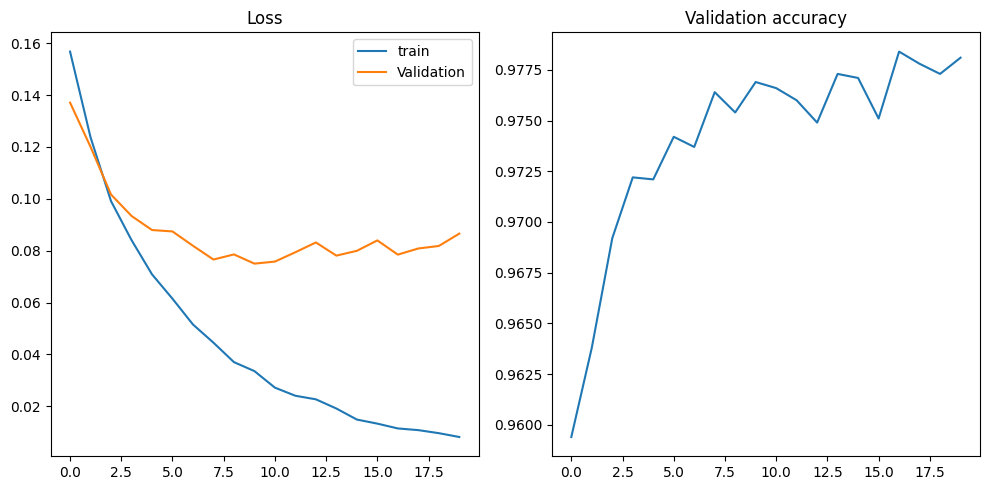

In [75]:
# epoch별 loss, accuracy의 변화흐름을 visualization
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(N_EPOCH), train_loss_list, label='train')
plt.plot(range(N_EPOCH), val_loss_list, label='Validation')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(N_EPOCH), val_accuracy_list)
plt.title('Validation accuracy')

plt.tight_layout()
plt.show()

## Model SAVE&LOAD

In [79]:
save_path = os.path.join(MODEL_SAVE_PATH, 'mnist')
os.makedirs(save_path, exist_ok=True)

save_file_path = os.path.join(save_path, 'mnist_mlp.pth')
print(save_file_path)

models/mnist/mnist_mlp.pth


In [81]:
# model save! : torch.save(저장할 모델, 저장할 경로)
torch.save(model, save_file_path)

In [82]:
# model 불러오기
load_model = torch.load(save_file_path)
load_model

MNistModel(
  (lr1): Linear(in_features=784, out_features=128, bias=True)
  (lr2): Linear(in_features=128, out_features=64, bias=True)
  (lr3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [83]:
from torchinfo import summary
summary(load_model, (BATCH_SIZE, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
MNistModel                               [256, 10]                 --
├─Linear: 1-1                            [256, 128]                100,480
├─ReLU: 1-2                              [256, 128]                --
├─Linear: 1-3                            [256, 64]                 8,256
├─ReLU: 1-4                              [256, 64]                 --
├─Linear: 1-5                            [256, 10]                 650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 28.00
Input size (MB): 0.80
Forward/backward pass size (MB): 0.41
Params size (MB): 0.44
Estimated Total Size (MB): 1.65

## Model Evaluate

In [84]:
# device로 옮기기
load_model = load_model.to(device)

# 평가모드로 변환
load_model.eval()

test_loss, test_acc = 0.0, 0.0
with torch.no_grad():
    
    # batch 단위로 계산하는 것
    for X,y in test_loader:
        # device 옮기기
        X, y = X.to(device), y.to(device)
        # inference
        pred = load_model(X)
        # test - loss, accuracy
        test_loss += loss_fn(pred, y).item()   
        test_acc += torch.sum(pred.argmax(axis=-1) == y).item()
    
    test_loss /= len(test_loader)          # batch 수로 나누기
    test_acc /= len(test_loader.dataset)   # 총 데이터 수로 나누기

print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Test Loss: 0.08655415121866099, Test Accuracy: 0.9781


## New Data Inference

In [85]:
from glob import glob
import cv2

In [103]:
img_file_list = glob('/Users/juhyeon/python-workspace/deeplearing_pytorch/num/*.png')   # 확장자가 png인 모든 파일의 경로를 만들어달라 (*.* 모든 파일 읽어오기)
img_file_list

['/Users/juhyeon/python-workspace/deeplearing_pytorch/num/three.png',
 '/Users/juhyeon/python-workspace/deeplearing_pytorch/num/eight2.png',
 '/Users/juhyeon/python-workspace/deeplearing_pytorch/num/three2.png',
 '/Users/juhyeon/python-workspace/deeplearing_pytorch/num/two.png',
 '/Users/juhyeon/python-workspace/deeplearing_pytorch/num/four.png',
 '/Users/juhyeon/python-workspace/deeplearing_pytorch/num/eight.png',
 '/Users/juhyeon/python-workspace/deeplearing_pytorch/num/five.png',
 '/Users/juhyeon/python-workspace/deeplearing_pytorch/num/one.png',
 '/Users/juhyeon/python-workspace/deeplearing_pytorch/num/seven.png',
 '/Users/juhyeon/python-workspace/deeplearing_pytorch/num/seven2.png']

In [104]:
file_cnt = len(img_file_list)
print('개수: ', file_cnt)

# 값이 모두 0인 tensor를 만들어줌 - 분류할 이미지를 저장할 변수
input_tensor = torch.zeros((file_cnt, 28, 28))

for i in range(file_cnt):
    # image read 
    test_img = cv2.imread(img_file_list[i], cv2.IMREAD_GRAYSCALE)
    # 28*28로 resizing
    test_img = cv2.resize(test_img, (28,28))
    # ndarray => torch.Tensor + Normalization(0~1) => input tensor에 image를 계속 추가하는 것!
    input_tensor[i] = transforms.ToTensor()(test_img)

개수:  10


In [105]:
print(type(input_tensor))
print(input_tensor.shape)
print(input_tensor.min(), input_tensor.max())   # 0~1 사이로 만들어줌

<class 'torch.Tensor'>
torch.Size([10, 28, 28])
tensor(0.) tensor(1.)


In [106]:
# inference
load_model.to(device)
load_model.eval()

input_tensor = input_tensor.to(device)
pred_new = load_model(input_tensor)  # model이 예측한 값

# model이 예측한 값을 확률값으로 변환해 주어야함! - softmax function 이용!
## Softmax: 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수
pred_proba = nn.Softmax(dim=-1)(pred_new)

print(pred_new.shape, pred_proba.shape)

torch.Size([10, 10]) torch.Size([10, 10])


In [107]:
# 각 image의 확률값을 다 더하면 1인 것 확인! (총 10장의 image)
pred_proba.sum(axis=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SumBackward1>)

In [108]:
# 확률이 가장 큰 값 - 예측한 값!
pred_label = pred_proba.argmax(dim=1)
pred_label

tensor([3, 5, 3, 2, 4, 3, 5, 4, 7, 2])

In [116]:
pred_label_proba = pred_proba.max(dim=-1).values
pred_label_proba

tensor([0.7683, 0.6367, 0.9999, 1.0000, 0.9952, 0.4413, 0.9994, 0.3365, 0.9321,
        0.6833], grad_fn=<MaxBackward0>)

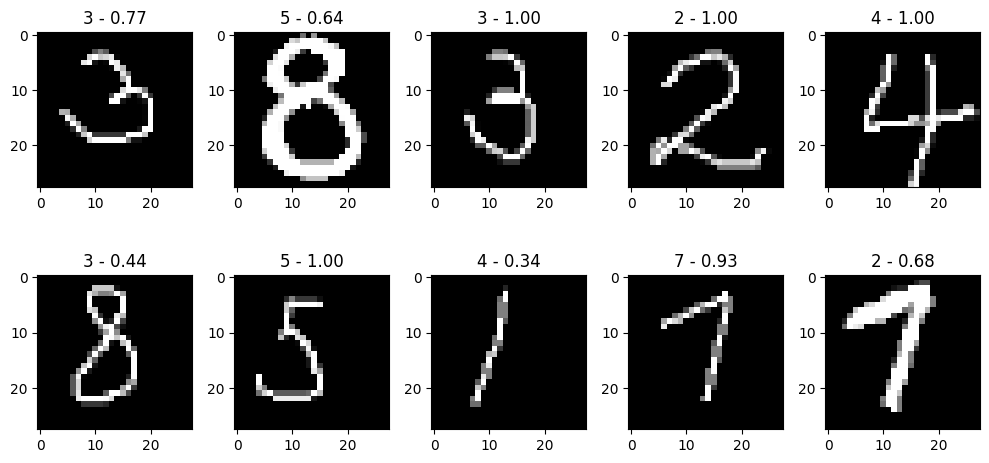

In [119]:
plt.figure(figsize=(10,5))

for i in range(file_cnt):
    plt.subplot(2, 5, i+1)
    plt.imshow(input_tensor[i].to('cpu').numpy(), cmap='gray')   # .numpy() : tensor를 ndarray로 변환!
    plt.title(f'{pred_label[i].item()} - {pred_label_proba[i].item():.2f}')

plt.tight_layout()
plt.show()